<a href="https://colab.research.google.com/github/yoonyoung27/public_big_data_analysis/blob/main/Titanic_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titanic_train.csv', encoding='cp949')  # CSV파일에 한글로 된 내용이 있는 경우
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* survival : Survival(0 = No, 1 = Yes)
* pclass : Ticket class(1 = 1st, 2 = 2nd, 3 = 3rd)
* sex : Sex
* Age : Age in years
* sibsp : Number of siblings/spouses aboard the Titanic
* parch : Number of parents/children aboard the Titanic
* ticket : Ticket number
* fare : Passenger fare
* cabin : Cabin number
* embarked : Port of Embarkation(C = Cherbourg, Q = Queenstown, S = Southampton)

In [7]:
titanic_df = sns.load_dataset('titanic')
titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


* survived : 생존 여부(0 = NO, 1 = Yes)
* pclass : 티켓 등급(1 = 1st, 2 = 2nd, 3 = 3rd)
* sex : 성별(male = 남성, female = 여성)
* age : 나이
* sibsip : 함께 탑승한 배우자, 형제/자매의 수
* parch : 함께 탑승한 부모님, 자녀의 수
* fare : 티켓 가격
* embarked : 출항지(C = Cherbourg, Q = Queenstown, S = Southampton)
* class : 티켓 등급(First, Second, Third)
* who : 남성/여성/아이 구분(man, woman, child)
* adult_male : 성인 남성인지의 여부(True, False)
* deck : 선박에서 배정받은 좌석의 구역(A,B,C,D,E,F,H,빈 값)
* embark_town : 출항지
* alive : 생존 여부(yes, no)
* alone : 혼자인지 여부(True, False)

In [6]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [8]:
category_cols = ["sex","embarked","class","who","adult_male","deck","embark_town","alive","alone"]

In [9]:
numerical_cols = ["age","sibsp","parch","fare"]

In [10]:
titanic_df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
# .value_counts()를 통해 각 컬럼별로 몇 개의 row가 있는지 셀 수 있습니다
for col in category_cols:
    print(col + " 카운트::")
    print(titanic_df.loc[:, col].value_counts())
    print()

sex 카운트::
male      577
female    314
Name: sex, dtype: int64

embarked 카운트::
S    644
C    168
Q     77
Name: embarked, dtype: int64

class 카운트::
Third     491
First     216
Second    184
Name: class, dtype: int64

who 카운트::
man      537
woman    271
child     83
Name: who, dtype: int64

adult_male 카운트::
True     537
False    354
Name: adult_male, dtype: int64

deck 카운트::
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

embark_town 카운트::
Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

alive 카운트::
no     549
yes    342
Name: alive, dtype: int64

alone 카운트::
True     537
False    354
Name: alone, dtype: int64



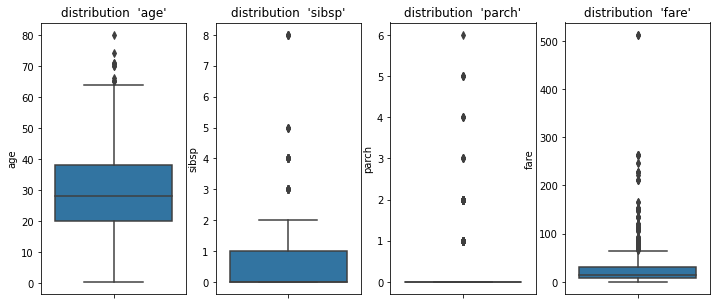

In [12]:
figure, ax_list = plt.subplots(nrows=1, ncols=4)
figure.set_size_inches(12,5)

for i in range(4):
    col = numerical_cols[i]
    sns.boxplot(data=titanic_df, y=col, showfliers=True, ax=ax_list[i])
    ax_list[i].set_title(f"distribution  '{col}'")

(3, 3)
(9,)


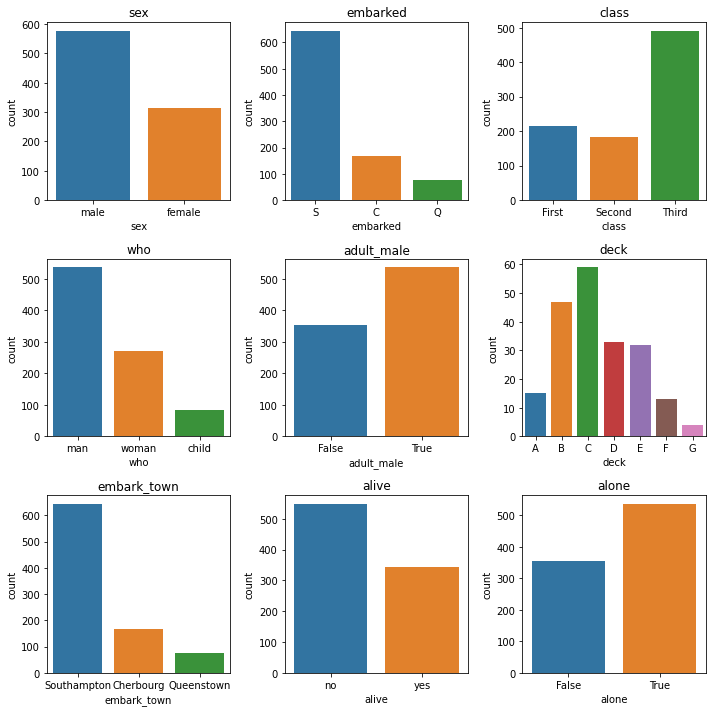

In [13]:
figure, ax_list_list = plt.subplots(nrows=3, ncols=3);
figure.set_size_inches(10,10)

ax_list = ax_list_list.reshape(9)  # 다차원 행렬의 차원을 원하는 모양으로 변경합니다.
print(ax_list_list.shape)
print(ax_list.shape)

for i in range(len(category_cols)):
    col = category_cols[i]
    sns.countplot(data=titanic_df, x=col, ax=ax_list[i])
    ax_list[i].set_title(col)

plt.tight_layout()

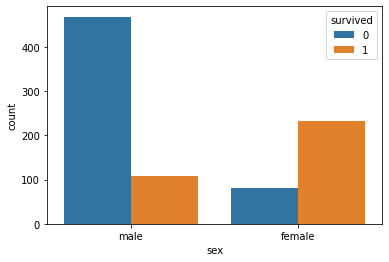

In [14]:
#성별과 생존의 관계
sns.countplot(data=titanic_df, x='sex', hue='survived');

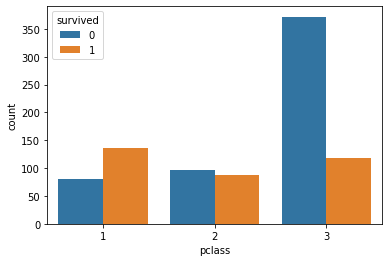

In [15]:
#좌석 등급과 생존의 관계
sns.countplot(data=titanic_df, x='pclass', hue='survived');

(3, 3)
(9,)


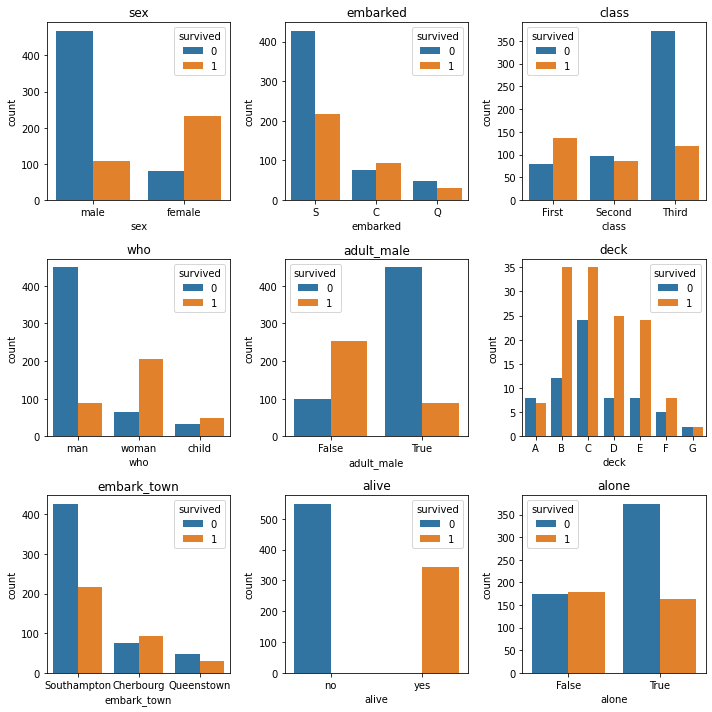

In [16]:
# 9개의 범주형 분류와 생존의 관계
# hue 인자로 'survived' 컬럼을 입력, 각 분류형 데이터 별로 생존/사망 분리하여 살펴보기

figure, ax_list_list = plt.subplots(nrows=3, ncols=3);
figure.set_size_inches(10,10)

ax_list = ax_list_list.reshape(9)
print(ax_list_list.shape)
print(ax_list.shape)

for i in range(len(category_cols)):
    col = category_cols[i]
    sns.countplot(data=titanic_df, x=col, ax=ax_list[i], hue='survived')
    ax_list[i].set_title(col)

plt.tight_layout()

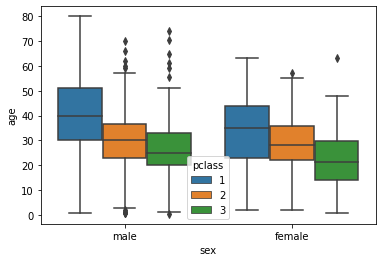

In [17]:
#성별과 좌석 등급에 따라, 나이의 boxplot 그려보기
sns.boxplot(data=titanic_df, x='sex', y='age', hue='pclass');

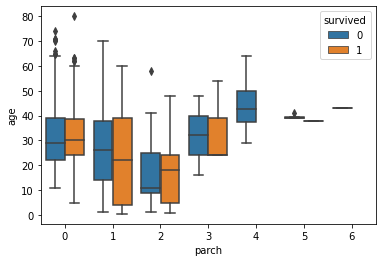

In [18]:
#배우자+형제자매의 수, 생존 여부 별 나이의 boxplot
sns.boxplot(data=titanic_df, x="parch", y="age", hue='survived');